Decreasing Trend

In [ ]:
!pip install khayyam
!pip install unidecode

     |████████████████████████████████| 46 kB 664 kB/s 
  Created wheel for khayyam: filename=Khayyam-3.0.17-cp37-cp37m-linux_x86_64.whl size=74590 sha256=3186fce473926254e9e0c683118664b75bcb133d24a00597a83146373fc95169
  Stored in directory: /root/.cache/pip/wheels/5c/27/04/a40f5c44518210fbd57f8a2045ee50f835bcb75fe884daca06
Successfully built khayyam
     |████████████████████████████████| 235 kB 22.9 MB/s 


In [ ]:
pip install 'openpyxl==3.0.0'

     |████████████████████████████████| 172 kB 32.6 MB/s 
  Created wheel for openpyxl: filename=openpyxl-3.0.0-py2.py3-none-any.whl size=241207 sha256=4149ba8a40b558848985f6c6bfd9647271f741d4325688af0dd85dd86d84479c
  Stored in directory: /root/.cache/pip/wheels/c7/64/ff/ce98f6e1d2701ae8e216c875da62feed2839ac8a3cae0ab8af
Successfully built openpyxl
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 2.5.9
    Uninstalling openpyxl-2.5.9:
      Successfully uninstalled openpyxl-2.5.9


In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
from numpy import array

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU
import tensorflow as tf

from itertools import cycle
from khayyam import *
from datetime import date, datetime
import datetime as dt
from unidecode import unidecode
# ! pip install plotly

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
khator = pd.read_csv('/content/drive/MyDrive/SN/Final/final__/khator.csv')
khator

,Open,Low,High,Close,Date,symbol,volume,gregorian_date,SMA5,EWMA5,RSI
0,23310.0,23310.0,23780.0,23370.0,1400-1-7,ختور,2262348,2021-03-27,NaN,23370.000000,NaN
1,22910.0,22910.0,23290.0,22990.0,1400-1-8,ختور,1800712,2021-03-28,NaN,23142.000000,NaN
2,22540.0,22540.0,22540.0,22950.0,1400-1-10,ختور,182855,2021-03-30,NaN,23051.052632,NaN
3,22500.0,22500.0,22500.0,22940.0,1400-1-11,ختور,52075,2021-03-31,NaN,23004.923077,NaN
4,22490.0,22490.0,22490.0,22930.0,1400-1-14,ختور,33657,2021-04-03,23036.0,22976.161137,NaN
...,...,...,...,...,...,...,...,...,...,...,...
188,11010.0,10540.0,11380.0,10940.0,1400-10-27,ختور,2837598,2022-01-17,11522.0,11360.344676,34.807512
189,10990.0,10400.0,10990.0,10450.0,1400-10-28,ختور,2314392,2022-01-18,11124.0,11056.896451,31.852468
190,10600.0,9930.0,10600.0,10140.0,1400-10-29,ختور,4597231,2022-01-19,10760.0,10751.264300,30.110807
191,9950.0,9640.0,10400.0,9950.0,1400-11-2,ختور,2733813,2022-01-22,10474.0,10484.176200,29.061937


In [ ]:
khator_social = pd.read_excel('/content/drive/MyDrive/SN/Final/social_data/ختور.xlsx')
khator_social

,date and time,view
0,۱۰:۴۰:۰۹ ۱۴۰۰/۰۱/۰۲,1550
1,۰۰:۳۳:۰۸ ۱۴۰۰/۰۱/۰۴,301
2,۰۷:۴۵:۰۷ ۱۴۰۰/۰۱/۰۷,10
3,۰۷:۴۵:۳۸ ۱۴۰۰/۰۱/۰۷,10
4,۰۹:۰۳:۴۵ ۱۴۰۰/۰۱/۰۷,210
...,...,...
8558,۱۲:۳۰:۰۵ ۱۴۰۰/۱۱/۰۳,25
8559,۱۲:۳۰:۰۵ ۱۴۰۰/۱۱/۰۳,6
8560,۱۲:۳۰:۴۵ ۱۴۰۰/۱۱/۰۳,12
8561,۱۵:۳۴:۰۱ ۱۴۰۰/۱۱/۰۳,394


In [ ]:
khator_social.columns = ['date and time', 'view']
khator_social['presian_date'] = khator_social['date and time'].apply(lambda x: x.split(" ")[1])
khator_social['gregorian_date'] = khator_social['presian_date'].apply(lambda x: JalaliDate(int(unidecode(x.split("/")[0])), int(unidecode(x.split("/")[1])), int(unidecode(x.split("/")[2]))).todate())
khator_social = khator_social[['gregorian_date', 'view']]
khator_social = khator_social.groupby(by='gregorian_date').mean()
khator_social['gregorian_date'] = khator_social.index
khator_social['gregorian_date'] = khator_social['gregorian_date'].astype(str)
khator_social['index'] = [i for i in range(len(khator_social))]
khator_social.set_index('index', inplace=True)
khator_social

,view,gregorian_date
index,,
0,1550.000000,2021-03-22
1,301.000000,2021-03-24
2,830.678571,2021-03-27
3,2086.538462,2021-03-28
4,4718.333333,2021-03-29
...,...,...
277,1373.133333,2022-01-19
278,2249.200000,2022-01-20
279,1192.941176,2022-01-21


# Merging

In [ ]:
khator_df=pd.merge(khator,khator_social, on='gregorian_date', how='inner')
khator_df

,Open,Low,High,Close,Date,symbol,volume,gregorian_date,SMA5,EWMA5,RSI,view
0,23310.0,23310.0,23780.0,23370.0,1400-1-7,ختور,2262348,2021-03-27,NaN,23370.000000,NaN,830.678571
1,22910.0,22910.0,23290.0,22990.0,1400-1-8,ختور,1800712,2021-03-28,NaN,23142.000000,NaN,2086.538462
2,22540.0,22540.0,22540.0,22950.0,1400-1-10,ختور,182855,2021-03-30,NaN,23051.052632,NaN,459.500000
3,22500.0,22500.0,22500.0,22940.0,1400-1-11,ختور,52075,2021-03-31,NaN,23004.923077,NaN,2457.888889
4,22490.0,22490.0,22490.0,22930.0,1400-1-14,ختور,33657,2021-04-03,23036.0,22976.161137,NaN,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
175,11010.0,10540.0,11380.0,10940.0,1400-10-27,ختور,2837598,2022-01-17,11522.0,11360.344676,34.807512,620.052632
176,10990.0,10400.0,10990.0,10450.0,1400-10-28,ختور,2314392,2022-01-18,11124.0,11056.896451,31.852468,112.627451
177,10600.0,9930.0,10600.0,10140.0,1400-10-29,ختور,4597231,2022-01-19,10760.0,10751.264300,30.110807,1373.133333
178,9950.0,9640.0,10400.0,9950.0,1400-11-2,ختور,2733813,2022-01-22,10474.0,10484.176200,29.061937,378.894737


In [ ]:
# k = khaperes_df['view'].ewm(span=10, adjust=False, min_periods=12).mean()
# # Get the 12-day EMA of the closing price
# d = khaperes_df['view'].ewm(span=22, adjust=False, min_periods=26).mean()
# # Subtract the 26-day EMA from the 12-Day EMA to get the MACD
# macd = k - d
# # Get the 9-Day EMA of the MACD for the Trigger line
# macd_s = macd.ewm(span=9, adjust=False, min_periods=9).mean()
# # Calculate the difference between the MACD - Trigger for the Convergence/Divergence value
# macd_h = macd - macd_s
# # Add all of our new values for the MACD to the dataframe
# khaperes_df['macd'] = khaperes_df.index.map(macd)
# khaperes_df['macd_h'] = khaperes_df.index.map(macd_h)
# khaperes_df['macd_s'] = khaperes_df.index.map(macd_s)
# # View our data
# pd.set_option("display.max_columns", None)
# khaperes_df

In [ ]:
def computeRSI (data, time_window):
    oneday = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    gain = 0 * oneday
    loss = 0 * oneday
    
    # up change is equal to the positive difference, otherwise equal to zero
    gain[oneday > 0] = oneday[ oneday>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    loss[oneday < 0] = oneday[ oneday < 0 ]
    
    # check pandas documentation for ewm
    # values are related to exponential decay
    # we set com=time_window-1 so we get decay alpha=1/time_window
    gain_avg   = gain.ewm(com=time_window-1 , min_periods=time_window).mean() #gainavg  is average gain over time window (period)
    loss_avg = loss.ewm(com=time_window-1 , min_periods=time_window).mean() #lossavg  is average loss over time window (period)
    
    rs = abs(gain_avg/loss_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [ ]:
khator_df['view'] = khator_df['view'].to_frame()
khator_df['SMA5_view'] = khator_df['view'].rolling(5).mean()
khator_df['EWMA5_view'] = khator_df['view'].ewm(span=5).mean()
khator_df['RSI_view'] = computeRSI(khator_df['view'], 14)

In [ ]:
khator_df

,Open,Low,High,Close,Date,symbol,volume,gregorian_date,SMA5,EWMA5,RSI,view,SMA5_view,EWMA5_view,RSI_view
0,23310.0,23310.0,23780.0,23370.0,1400-1-7,ختور,2262348,2021-03-27,NaN,23370.000000,NaN,830.678571,NaN,830.678571,NaN
1,22910.0,22910.0,23290.0,22990.0,1400-1-8,ختور,1800712,2021-03-28,NaN,23142.000000,NaN,2086.538462,NaN,1584.194505,NaN
2,22540.0,22540.0,22540.0,22950.0,1400-1-10,ختور,182855,2021-03-30,NaN,23051.052632,NaN,459.500000,NaN,1051.444477,NaN
3,22500.0,22500.0,22500.0,22940.0,1400-1-11,ختور,52075,2021-03-31,NaN,23004.923077,NaN,2457.888889,NaN,1635.659848,NaN
4,22490.0,22490.0,22490.0,22930.0,1400-1-14,ختور,33657,2021-04-03,23036.0,22976.161137,NaN,8.000000,1168.521184,1010.823603,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,11010.0,10540.0,11380.0,10940.0,1400-10-27,ختور,2837598,2022-01-17,11522.0,11360.344676,34.807512,620.052632,392.270744,440.768412,48.741796
176,10990.0,10400.0,10990.0,10450.0,1400-10-28,ختور,2314392,2022-01-18,11124.0,11056.896451,31.852468,112.627451,254.496234,331.388091,45.478202
177,10600.0,9930.0,10600.0,10140.0,1400-10-29,ختور,4597231,2022-01-19,10760.0,10751.264300,30.110807,1373.133333,486.764761,678.636505,53.760734
178,9950.0,9640.0,10400.0,9950.0,1400-11-2,ختور,2733813,2022-01-22,10474.0,10484.176200,29.061937,378.894737,508.107345,578.722583,47.616336


# RSI

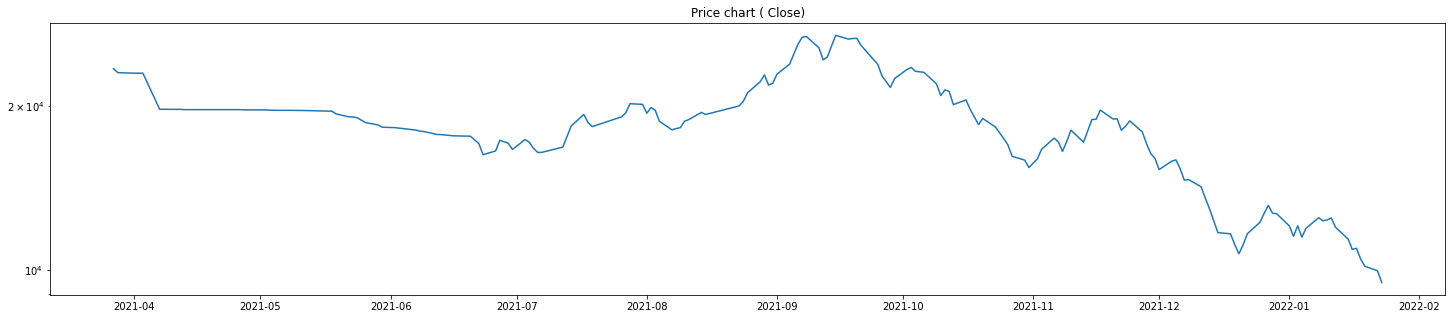

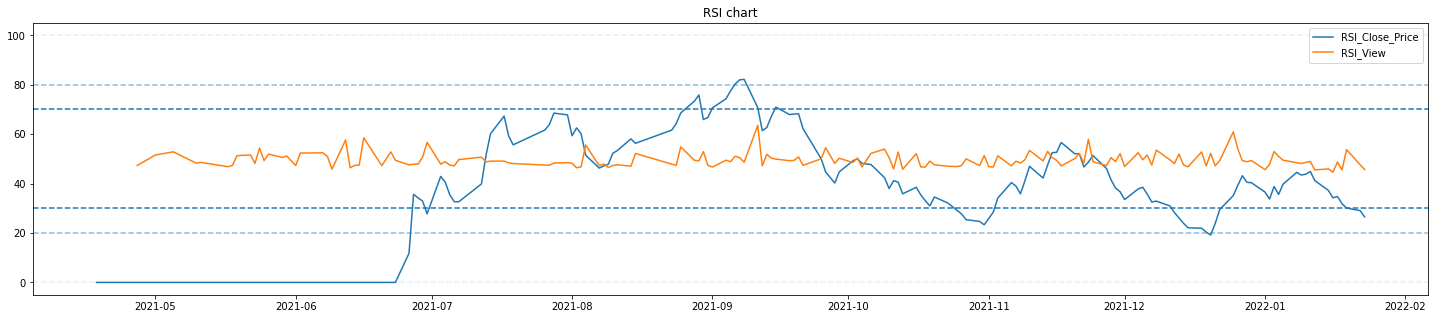

In [ ]:
plt.figure(figsize=(25,5))
khator_df['date'] = pd.to_datetime(khator_df['gregorian_date'], format = '%Y-%m-%d')
plt.plot(khator_df['date'], khator_df['Close'],label='Close_Price')
plt.title('Price chart ( Close)')
plt.yscale("log")
plt.show()
plt.figure(figsize=(25,5))
plt.title('RSI chart')
plt.plot(khator_df['date'], khator_df['RSI'],label='RSI_Close_Price')
plt.plot(khator_df['date'], khator_df['RSI_view'],label='RSI_View')
plt.axhline(0, linestyle='--', alpha=0.1)
plt.axhline(20, linestyle='--', alpha=0.5)
plt.axhline(30, linestyle='--')
plt.axhline(70, linestyle='--')
plt.axhline(80, linestyle='--', alpha=0.5)
plt.axhline(100, linestyle='--', alpha=0.1)
plt.legend()
plt.show()

In [ ]:
# Force lowercase (optional)
khator_df.columns = [x.lower() for x in khator_df.columns]
fig = make_subplots(rows=2, cols=1,subplot_titles=("Logarithmic Scale","Default Scale"))
# close price
fig.append_trace(
    go.Scatter(
        x=khator_df['gregorian_date'],
        y=(khator_df['close']),
        line=dict(color='#ff9900', width=1),
        name='Close',
        legendgroup='1',
    ), row=1, col=1
)

fig.append_trace(
    go.Scatter(
        x=khator_df['gregorian_date'],
        y=khator_df['rsi'],
        line=dict(color='#ff9900', width=2),
        name='RSI_Close',
        
        legendgroup='2',

    ), row=2, col=1
)

fig.append_trace(
    go.Scatter(
        x=khator_df['gregorian_date'],
        y=khator_df['rsi_view'],
        line=dict(color='black', width=2),
        name='RSI_View',

        legendgroup='2',
        
    ), row=2, col=1
)

layout = go.Layout(
    plot_bgcolor='#efefef',
    
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=18,
     width=1500,
     height=900
    # xaxis=dict(
    #     rangeslider=dict(
    #         visible=False
        )
    

# Update options and show plot
fig.update_yaxes( type="log", row=1, col=1)

fig.update_layout(layout)

fig.show()

# SMA

In [ ]:
khator_df.columns = [x.lower() for x in khator_df.columns]
fig = make_subplots(rows=2, cols=1,subplot_titles=("Logarithmic Scale","Default Scale"))
# close price
fig.append_trace(
    go.Scatter(
        x=khator_df['gregorian_date'],
        y=(khator_df['close']),
        line=dict(color='#ff9900', width=1),
        name='Close',
        legendgroup='1',
    ), row=1, col=1
)

fig.append_trace(
    go.Scatter(
        x=khator_df['gregorian_date'],
        y=khator_df['sma5'],
        line=dict(color='#ff9900', width=2),
        name='SMA5_Close',
        legendgroup='2',

    ), row=2, col=1
)

fig.append_trace(
    go.Scatter(
        x=khator_df['gregorian_date'],
        y=khator_df['sma5_view'],
        line=dict(color='black', width=2),
        name='SMA5_view',

        legendgroup='2',
        
    ), row=2, col=1
)

layout = go.Layout(
    plot_bgcolor='#efefef',
    
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=18,
     width=1500,
     height=900
        )
    

# Update options and show plot
fig.update_yaxes( type="log", row=1, col=1)

fig.update_layout(layout)

fig.show()

In [ ]:
khator_df

,open,low,high,close,date,symbol,volume,gregorian_date,sma5,ewma5,rsi,view,sma5_view,ewma5_view,rsi_view,date
0,23310.0,23310.0,23780.0,23370.0,1400-1-7,ختور,2262348,2021-03-27,NaN,23370.000000,NaN,830.678571,NaN,830.678571,NaN,2021-03-27
1,22910.0,22910.0,23290.0,22990.0,1400-1-8,ختور,1800712,2021-03-28,NaN,23142.000000,NaN,2086.538462,NaN,1584.194505,NaN,2021-03-28
2,22540.0,22540.0,22540.0,22950.0,1400-1-10,ختور,182855,2021-03-30,NaN,23051.052632,NaN,459.500000,NaN,1051.444477,NaN,2021-03-30
3,22500.0,22500.0,22500.0,22940.0,1400-1-11,ختور,52075,2021-03-31,NaN,23004.923077,NaN,2457.888889,NaN,1635.659848,NaN,2021-03-31
4,22490.0,22490.0,22490.0,22930.0,1400-1-14,ختور,33657,2021-04-03,23036.0,22976.161137,NaN,8.000000,1168.521184,1010.823603,NaN,2021-04-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,11010.0,10540.0,11380.0,10940.0,1400-10-27,ختور,2837598,2022-01-17,11522.0,11360.344676,34.807512,620.052632,392.270744,440.768412,48.741796,2022-01-17
176,10990.0,10400.0,10990.0,10450.0,1400-10-28,ختور,2314392,2022-01-18,11124.0,11056.896451,31.852468,112.627451,254.496234,331.388091,45.478202,2022-01-18
177,10600.0,9930.0,10600.0,10140.0,1400-10-29,ختور,4597231,2022-01-19,10760.0,10751.264300,30.110807,1373.133333,486.764761,678.636505,53.760734,2022-01-19
178,9950.0,9640.0,10400.0,9950.0,1400-11-2,ختور,2733813,2022-01-22,10474.0,10484.176200,29.061937,378.894737,508.107345,578.722583,47.616336,2022-01-22


In [ ]:
khator_df['sma5']=khator_df['sma5'].fillna(value=khator_df['sma5'].mean())
khator_df['rsi']=khator_df['rsi'].fillna(value=khator_df['rsi'].mean())
khator_df['sma5_view']=khator_df['sma5_view'].fillna(value=khator_df['sma5_view'].mean())
khator_df['rsi_view']=khator_df['rsi_view'].fillna(value=khator_df['rsi_view'].mean())

In [ ]:
khator_df

,open,low,high,close,date,symbol,volume,gregorian_date,sma5,ewma5,rsi,view,sma5_view,ewma5_view,rsi_view,date
0,23310.0,23310.0,23780.0,23370.0,1400-1-7,ختور,2262348,2021-03-27,18187.704545,23370.000000,36.518072,830.678571,1428.129001,830.678571,49.566713,2021-03-27
1,22910.0,22910.0,23290.0,22990.0,1400-1-8,ختور,1800712,2021-03-28,18187.704545,23142.000000,36.518072,2086.538462,1428.129001,1584.194505,49.566713,2021-03-28
2,22540.0,22540.0,22540.0,22950.0,1400-1-10,ختور,182855,2021-03-30,18187.704545,23051.052632,36.518072,459.500000,1428.129001,1051.444477,49.566713,2021-03-30
3,22500.0,22500.0,22500.0,22940.0,1400-1-11,ختور,52075,2021-03-31,18187.704545,23004.923077,36.518072,2457.888889,1428.129001,1635.659848,49.566713,2021-03-31
4,22490.0,22490.0,22490.0,22930.0,1400-1-14,ختور,33657,2021-04-03,23036.000000,22976.161137,36.518072,8.000000,1168.521184,1010.823603,49.566713,2021-04-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,11010.0,10540.0,11380.0,10940.0,1400-10-27,ختور,2837598,2022-01-17,11522.000000,11360.344676,34.807512,620.052632,392.270744,440.768412,48.741796,2022-01-17
176,10990.0,10400.0,10990.0,10450.0,1400-10-28,ختور,2314392,2022-01-18,11124.000000,11056.896451,31.852468,112.627451,254.496234,331.388091,45.478202,2022-01-18
177,10600.0,9930.0,10600.0,10140.0,1400-10-29,ختور,4597231,2022-01-19,10760.000000,10751.264300,30.110807,1373.133333,486.764761,678.636505,53.760734,2022-01-19
178,9950.0,9640.0,10400.0,9950.0,1400-11-2,ختور,2733813,2022-01-22,10474.000000,10484.176200,29.061937,378.894737,508.107345,578.722583,47.616336,2022-01-22


In [ ]:
khator_df.isna().sum()

open              0
low               0
high              0
close             0
date              0
symbol            0
volume            0
gregorian_date    0
sma5              0
ewma5             0
rsi               0
view              0
sma5_view         0
ewma5_view        0
rsi_view          0
date              0
dtype: int64

## Part 1 : predicting stock close price

In [ ]:
khator_new = khator_df[['gregorian_date','close']]

print("Shape of dataframe:", khator_new.shape)

Shape of dataframe: (180, 2)


In [ ]:
del khator_new['gregorian_date']
scaler=MinMaxScaler(feature_range=(0,1))
khator_new=scaler.fit_transform(np.array(khator_new).reshape(-1,1))


In [ ]:
def split(y, train_size=0.72):
    time_step = 15
    mid_train = int(len(y)*train_size)
    mid_test=len(y)-mid_train
    train_data=y[0:mid_train,:]
    test_data =y[mid_train:len(y),:1]
    X_train, y_train = create_dataset(train_data, time_step)
    X_test, y_test = create_dataset(test_data, time_step)
    return train_data,test_data,X_train, y_train,X_test,y_test

# convert an array of values into a dataset matrix
def create_dataset(data, time_step=1):
    X = []
    Y=[]
    for i in range(len(data)-time_step-1):
        z = data[i:(i+time_step), 0]   
        X.append(z)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

In [ ]:
train_data,test_data,X_train, y_train,X_test,y_test=split(khator_new, train_size=0.88)
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

train_data:  (158, 1)
test_data:  (22, 1)
X_train:  (142, 15)
y_train:  (142,)
X_test:  (6, 15)
y_test (6,)


In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
tf.keras.backend.clear_session()
time_step = 15
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 gru (GRU)                   (None, 15, 32)            6336      
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 25,377
Trainable params: 25,377
Non-trainable params: 0
_________________________________________________________________


# Fitting the model

In [ ]:
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
history_close_price=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=5,verbose=1)

Epoch 1/50
29/29 [==============================] - 9s 84ms/step - loss: 0.0568 - val_loss: 0.0811
Epoch 2/50
29/29 [==============================] - 1s 28ms/step - loss: 0.0208 - val_loss: 0.0608
Epoch 3/50
29/29 [==============================] - 1s 28ms/step - loss: 0.0188 - val_loss: 0.0332
Epoch 4/50
29/29 [==============================] - 1s 28ms/step - loss: 0.0162 - val_loss: 0.0182
Epoch 5/50
29/29 [==============================] - 1s 28ms/step - loss: 0.0150 - val_loss: 0.0212
Epoch 6/50
29/29 [==============================] - 1s 28ms/step - loss: 0.0133 - val_loss: 0.0144
Epoch 7/50
29/29 [==============================] - 1s 28ms/step - loss: 0.0112 - val_loss: 0.0086
Epoch 8/50
29/29 [==============================] - 1s 29ms/step - loss: 0.0102 - val_loss: 0.0070
Epoch 9/50
29/29 [==============================] - 1s 29ms/step - loss: 0.0113 - val_loss: 0.0121
Epoch 10/50
29/29 [==============================] - 1s 30ms/step - loss: 0.0084 - val_loss: 0.0165
Epoch 11/

# LOSS

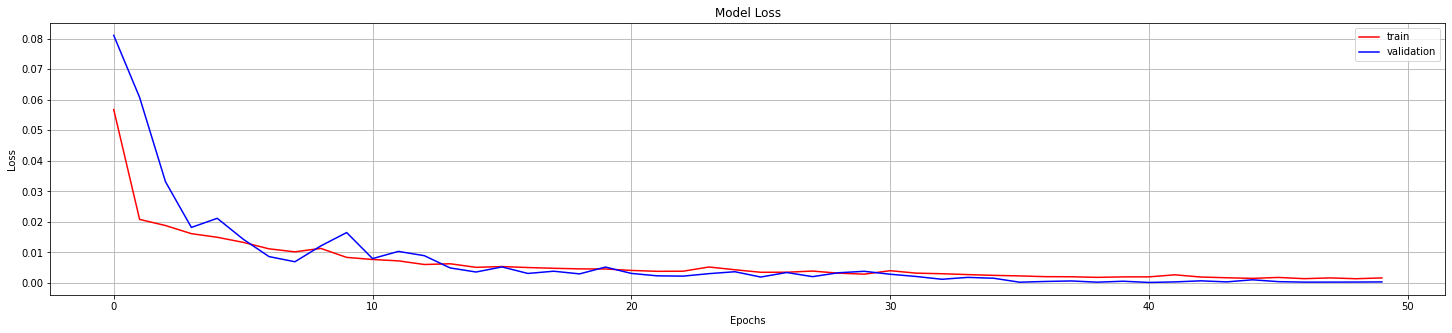

In [ ]:
# Plot the Loss Curves

plt.figure(figsize=(25,5))
plt.plot(history_close_price.history['loss'],'r')
plt.plot(history_close_price.history['val_loss'],'b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()


In [ ]:
predict=model.predict(X_test)
predictt = scaler.inverse_transform(predict)
ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [ ]:
print("Test data R2 score:", r2_score(ytest, predictt))

Test data R2 score: 0.5549383899967195


In [ ]:
k=test_data[len(test_data)-time_step:].reshape(1,-1)
temp=list(k)
temp=temp[0].tolist()
next_day_predict=[]
steps=time_step
for i in range(5):
    if(len(temp)>time_step):
        k=np.array(temp[1:])
        k = k.reshape(1,-1)
        k = k.reshape((1, steps, 1))
        predict_next_days = model.predict(k, verbose=0)
        temp.extend(predict_next_days[0].tolist())
        temp=temp[1:]
        next_day_predict.extend(predict_next_days.tolist())
        i=i+1
    else:
        k = k.reshape((1, steps,1))
        predict_next_days = model.predict(k, verbose=0)
        temp.extend(predict_next_days[0].tolist())
        next_day_predict.extend(predict_next_days.tolist())
        i=i+1
               
last_days=np.arange(1,time_step+1)
pre_days=np.arange(time_step+1,time_step+10+1)

print(next_day_predict)
print("--------------------------------------------")
print('last_days are',last_days)
print("--------------------------------------------")
print('pre_days are',pre_days)

[[-0.005277611780911684], [-0.02159653604030609], [-0.036386288702487946], [-0.05020318180322647], [-0.06339526176452637]]
--------------------------------------------
last_days are [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
--------------------------------------------
pre_days are [16 17 18 19 20 21 22 23 24 25]


# Prediction

In [ ]:
value = np.empty((len(last_days)+11,1))
value[:] = np.nan
value = value.reshape(1,-1).tolist()[0]

real_last_days_value = value
predicted_days_value = value

real_last_days_value[1:time_step+1] = scaler.inverse_transform(khator_new[len(khator_new)-time_step:]).reshape(1,-1).tolist()[0]
predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(next_day_predict).reshape(-1,1)).reshape(1,-1).tolist()[0]

plot = pd.DataFrame({
    'real_last_days_value':real_last_days_value,
    'predicted_days_value':predicted_days_value
})

j=cycle(['Last 15 days of close price ','Predicted next 5 days of close price '])
fig = px.line(plot,x=plot.index, y=[plot['real_last_days_value'],
                                                      plot['predicted_days_value']],
              labels={'value': 'Stock of close price','index': 'Timestamp'},color_discrete_map={
                 "real_last_days_value": "red",
                 "predicted_days_value": "red"})

fig.add_vline(x=15, line_width=3, line_dash="dash", line_color="blue")
fig.add_vline(x=16, line_width=3, line_dash="dash", line_color="green", fillcolor="blue")
fig.add_hrect(y0=16, y1=20, line_width=0, opacity=0.2)


fig.update_layout(title_text='Compare last 15 days vs next 5 days of khator stock',
                  plot_bgcolor='white', font_size=13, font_color='black',legend_title_text='Indicators')

fig.for_each_trace(lambda t:  t.update(name = next(j)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

##### Real close_price--> 3 bahman in tsetmc site =9470 , 4 bahmn = 9030   (decrese <-0.5 we assaign -1 (based on pdf))
##### Real close_price  --> 3 bahman (timestamp=15) in our data =9470 ,  our model prediction for 4 bahmn(timestamp=16) = 9377 (decrease<-0.5 we assaign -1 (based on pdf))
##------------------------------------------------------------------------------
### So our accuracy is 100%

## Part 2 prediction with adding social indicators

### Indicators

In [ ]:
khator_new = khator_df[['gregorian_date','rsi','rsi_view','sma5','sma5_view']]


print("Shape of dataframe:", khator_new.shape)

Shape of dataframe: (180, 5)


In [ ]:
del khator_new['gregorian_date']
scaler=MinMaxScaler(feature_range=(0,1))
khator_new=scaler.fit_transform(np.array(khator_new).reshape(-1,1))


In [ ]:
train_data,test_data,X_train, y_train,X_test,y_test=split(khator_new, train_size=0.70)
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

train_data:  (503, 1)
test_data:  (217, 1)
X_train:  (487, 15)
y_train:  (487,)
X_test:  (201, 15)
y_test (201,)


In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [ ]:
tf.keras.backend.clear_session()
time_step = 15
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 gru (GRU)                   (None, 15, 32)            6336      
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 25,377
Trainable params: 25,377
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
history_indicator=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=32,verbose=1)


Epoch 1/50
16/16 [==============================] - 13s 206ms/step - loss: 0.1145 - val_loss: 0.0547
Epoch 2/50
16/16 [==============================] - 1s 35ms/step - loss: 0.1104 - val_loss: 0.0564
Epoch 3/50
16/16 [==============================] - 1s 34ms/step - loss: 0.1049 - val_loss: 0.0565
Epoch 4/50
16/16 [==============================] - 1s 35ms/step - loss: 0.1039 - val_loss: 0.0560
Epoch 5/50
16/16 [==============================] - 1s 36ms/step - loss: 0.1046 - val_loss: 0.0558
Epoch 6/50
16/16 [==============================] - 1s 35ms/step - loss: 0.1034 - val_loss: 0.0590
Epoch 7/50
16/16 [==============================] - 1s 35ms/step - loss: 0.1027 - val_loss: 0.0582
Epoch 8/50
16/16 [==============================] - 1s 34ms/step - loss: 0.0964 - val_loss: 0.1012
Epoch 9/50
16/16 [==============================] - 1s 34ms/step - loss: 0.0782 - val_loss: 0.1171
Epoch 10/50
16/16 [==============================] - 1s 34ms/step - loss: 0.0690 - val_loss: 0.1280
Epoch 1

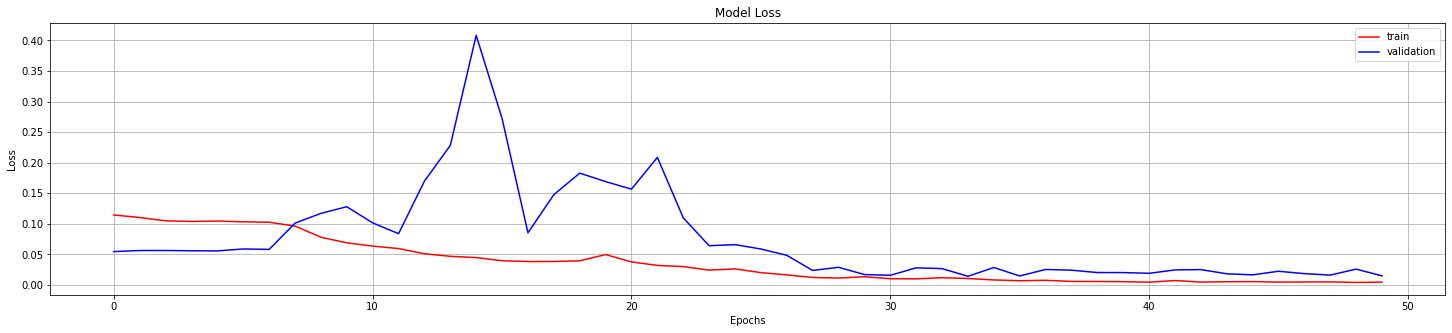

In [ ]:
# Plot the Loss Curves

plt.figure(figsize=(25,5))
plt.plot(history_indicator.history['loss'],'r')
plt.plot(history_indicator.history['val_loss'],'b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()


In [ ]:
predict=model.predict(X_test)
predictt = scaler.inverse_transform(predict)
ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [ ]:
print("Test data R2 score:", r2_score(ytest, predictt))

Test data R2 score: 0.7249713171840242


In [ ]:
k=test_data[len(test_data)-time_step:].reshape(1,-1)
temp=list(k)
temp=temp[0].tolist()
next_day_predict=[]
steps=time_step
for i in range(5):
    if(len(temp)>time_step):
        k=np.array(temp[1:])
        k = k.reshape(1,-1)
        k = k.reshape((1, steps, 1))
        predict_next_days = model.predict(k, verbose=0)
        temp.extend(predict_next_days[0].tolist())
        temp=temp[1:]
        next_day_predict.extend(predict_next_days.tolist())
        i=i+1
    else:
        k = k.reshape((1, steps,1))
        predict_next_days = model.predict(k, verbose=0)
        temp.extend(predict_next_days[0].tolist())
        next_day_predict.extend(predict_next_days.tolist())
        i=i+1
               
last_days=np.arange(1,time_step+1)
pre_days=np.arange(time_step+1,time_step+10+1)

print(next_day_predict)
print("--------------------------------------------")
print('last_days are',last_days)
print("--------------------------------------------")
print('pre_days are',pre_days)


[[-0.04235897585749626], [-0.15812444686889648], [0.4599190652370453], [0.2845260798931122], [-0.053224727511405945]]
--------------------------------------------
last_days are [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
--------------------------------------------
pre_days are [16 17 18 19 20 21 22 23 24 25]


In [ ]:
value = np.empty((len(last_days)+11,1))
value[:] = np.nan
value = value.reshape(1,-1).tolist()[0]

real_last_days_value = value
predicted_days_value = value

real_last_days_value[1:time_step+1] = scaler.inverse_transform(khator_new[len(khator_new)-time_step:]).reshape(1,-1).tolist()[0]
predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(next_day_predict).reshape(-1,1)).reshape(1,-1).tolist()[0]

plot = pd.DataFrame({
    'real_last_days_value':real_last_days_value,
    'predicted_days_value':predicted_days_value
})

j=cycle(['Last 15 days with indicator of close price and view price','Predicted next 5 days with indicator of close price and view price'])
fig = px.line(plot,x=plot.index, y=[plot['real_last_days_value'],
                                                      plot['predicted_days_value']],
              labels={'value': 'Stock of indicator price','index': 'Timestamp'},color_discrete_map={
                 "real_last_days_value": "red",
                 "predicted_days_value": "red"})

fig.add_vline(x=15, line_width=3, line_dash="dash", line_color="blue")
fig.add_vline(x=16, line_width=3, line_dash="dash", line_color="green", fillcolor="blue")
fig.add_hrect(y0=16, y1=20, line_width=0, fillcolor="red", opacity=0.2)


fig.update_layout(title_text='Compare last 15 days vs next 5 days of khator stock',
                  plot_bgcolor='white', font_size=13, font_color='black',legend_title_text='Indicators')

fig.for_each_trace(lambda t:  t.update(name = next(j)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Decreasing trend

##### Real close_price--> 3 bahman in tsetmc site =9470 , 4 bahmn = 9030   (decrese <-0.5 we assaign -1 (based on pdf))
##### Real close_price and view with indicator --> 3 bahman (timestamp=15) in our data =505.6032 , predict for 4 bahmn(timestamp=16) = -1.12 (decrease<-0.5 we assaign -1 (based on pdf))
##------------------------------------------------------------------------------
### So our accuracy is 100%